# Linear Spline Approximation

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp09.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-22</i>
<hr>

## Initial tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import BasisSpline

In [2]:
def f(x):
    return 50 - np.cos(x**2 / 8) * (x - np.pi + .5)**2

In [3]:
xmin, xmax = 0.0, 1.5*np.pi
off = 0.05
xlims = [xmin - off, xmax + off]
n = 401
x = np.linspace(xmin, xmax, n)
y = f(x)
ymin, ymax = y.min(), y.max()
ywid = ymax - ymin
ylims = [ymin - 0.5*ywid, ymax + 0.1*ywid]

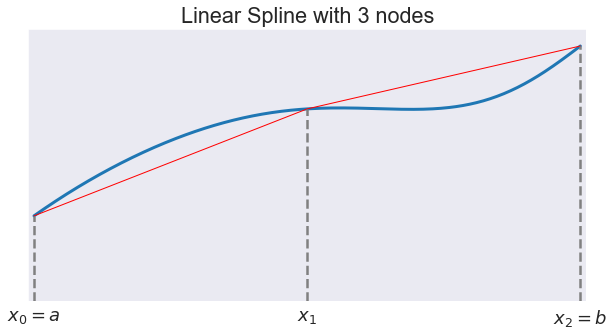

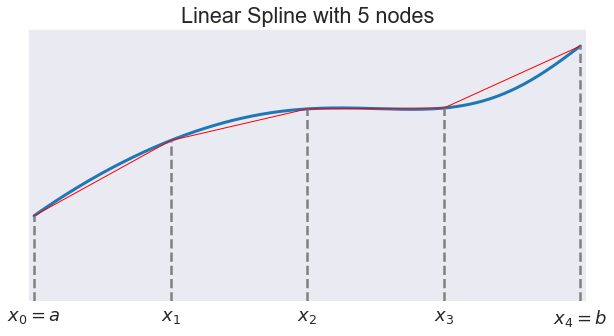

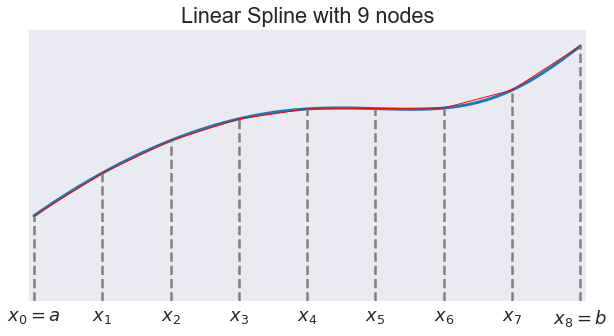

In [4]:
figs = []
for nnode in 3, 5, 9:
    F = BasisSpline(nnode, xmin, xmax, k=1, f=f)
    xnodes = F.nodes[0]

    xx = np.r_[x, xnodes]
    xx.sort()

    fig, ax= plt.subplots(figsize=[10,5])
    ax.set(title = f'Linear Spline with {nnode} nodes',
           #xlabel='', ylabel='', 
           xlim=xlims, ylim=ylims)
    
    ax.plot(xx, f(xx), lw=3)  # true function
    ax.plot(xx, F(xx), 'r', lw=1) # approximation
    ax.set(yticks=ylims, yticklabels=['', ''])
    xe = ['$x_{%d}$' % k for k in range(nnode)]
    xe[0], xe[-1] = '$x_0=a$', '$x_{%d}=b$' % (nnode-1)
    ax.set_xticks(xnodes)
    ax.set_xticklabels(xe, fontsize=18)
    for i, xi in enumerate(xnodes):
        ax.vlines(xi, ylims[0], F(xi), 'gray','--')
        
    figs.append(fig)    